# Исследовательский анализ данных (EDA)
## Анализ лекарственной активности химических соединений

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля графиков
plt.style.use('default')
sns.set_palette("husl")

In [5]:
# Загрузка данных
!pip install openpyxl

# Клонирование репозитория
!git clone https://github.com/schwarzRabe/drug_activity_prediction.git

# Переход в папку и загрузка данных
import pandas as pd
import os

os.chdir('drug_activity_prediction')
df = pd.read_excel('data/chemi_data.xlsx')
print("Данные загружены успешно!")
print(f"Размер данных: {df.shape}")

Cloning into 'drug_activity_prediction'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 16 (delta 1), reused 11 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (16/16), 1.31 MiB | 6.70 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Данные загружены успешно!
Размер данных: (1001, 214)


In [9]:
print("ОСНОВНАЯ ИНФОРМАЦИЯ")
print(f"Размер датасета: {df.shape}")
print(f"Количество признаков: {df.shape[1]}")
print(f"Количество образцов: {df.shape[0]}")

ОСНОВНАЯ ИНФОРМАЦИЯ
Размер датасета: (1001, 214)
Количество признаков: 214
Количество образцов: 1001


In [11]:
# Типы данных
df.dtypes.value_counts()

,count
int64,107
float64,107


In [24]:
df.head()

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,...,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,...,0,0,0,0,0,0,0,0,3,0
2,2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,...,0,0,0,0,0,0,0,0,3,0
3,3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,...,0,0,0,0,0,0,0,0,4,0
4,4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# Пропущенные значения
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df.head(15)

,Пропущенные значения,Процент
MaxPartialCharge,3,0.2997
MinPartialCharge,3,0.2997
MaxAbsPartialCharge,3,0.2997
MinAbsPartialCharge,3,0.2997
BCUT2D_MWHI,3,0.2997
BCUT2D_MWLOW,3,0.2997
BCUT2D_CHGHI,3,0.2997
BCUT2D_CHGLO,3,0.2997
BCUT2D_LOGPHI,3,0.2997
BCUT2D_LOGPLOW,3,0.2997


In [48]:
# Удаление всех строк с хотя бы одним пропущенным значением
df_cleaned = df.dropna()

# Проверка результата
print(f"Первоначальна форма: {df.shape}")
print(f"Форма после удаления пропущенных данных: {df_cleaned.shape}")

Первоначальна форма: (1001, 214)
Форма после удаления пропущенных данных: (998, 214)


Анализ целевых переменных IC50, CC50, SI

In [27]:
target_cols = ['IC50, mM', 'CC50, mM', 'SI']

In [49]:
# Описательная статистика целевых переменных IC50, CC50, SI
df_cleaned[target_cols].describe()

,"IC50, mM","CC50, mM",SI
count,998.000000,998.000000,998.000000
mean,221.118757,586.668414,72.650005
std,400.510657,642.016454,685.504279
min,0.003517,0.700808,0.011489
25%,12.491340,99.999036,1.457233
50%,45.992006,408.793314,3.856410
75%,224.408630,891.770961,16.525000
max,4128.529377,4538.976189,15620.600000


In [50]:
    # Взаимосвязь переменных SI, CC50 и IC50

    calculated_si = df_cleaned['CC50, mM'] / df['IC50, mM']
    correlation = df_cleaned['SI'].corr(calculated_si)
    print(f"Корреляция между SI и CC50/IC50: {correlation:.6f}")

    # Различия между SI и вычисленным SI
    diff = np.abs(df_cleaned['SI'] - calculated_si)
    print(f"Среднее абсолютное отклонение: {diff.mean():.6f}")
    print(f"Максимальное отклонение: {diff.max():.6f}")
    print()

Корреляция между SI и CC50/IC50: 1.000000
Среднее абсолютное отклонение: 0.000000
Максимальное отклонение: 0.000000



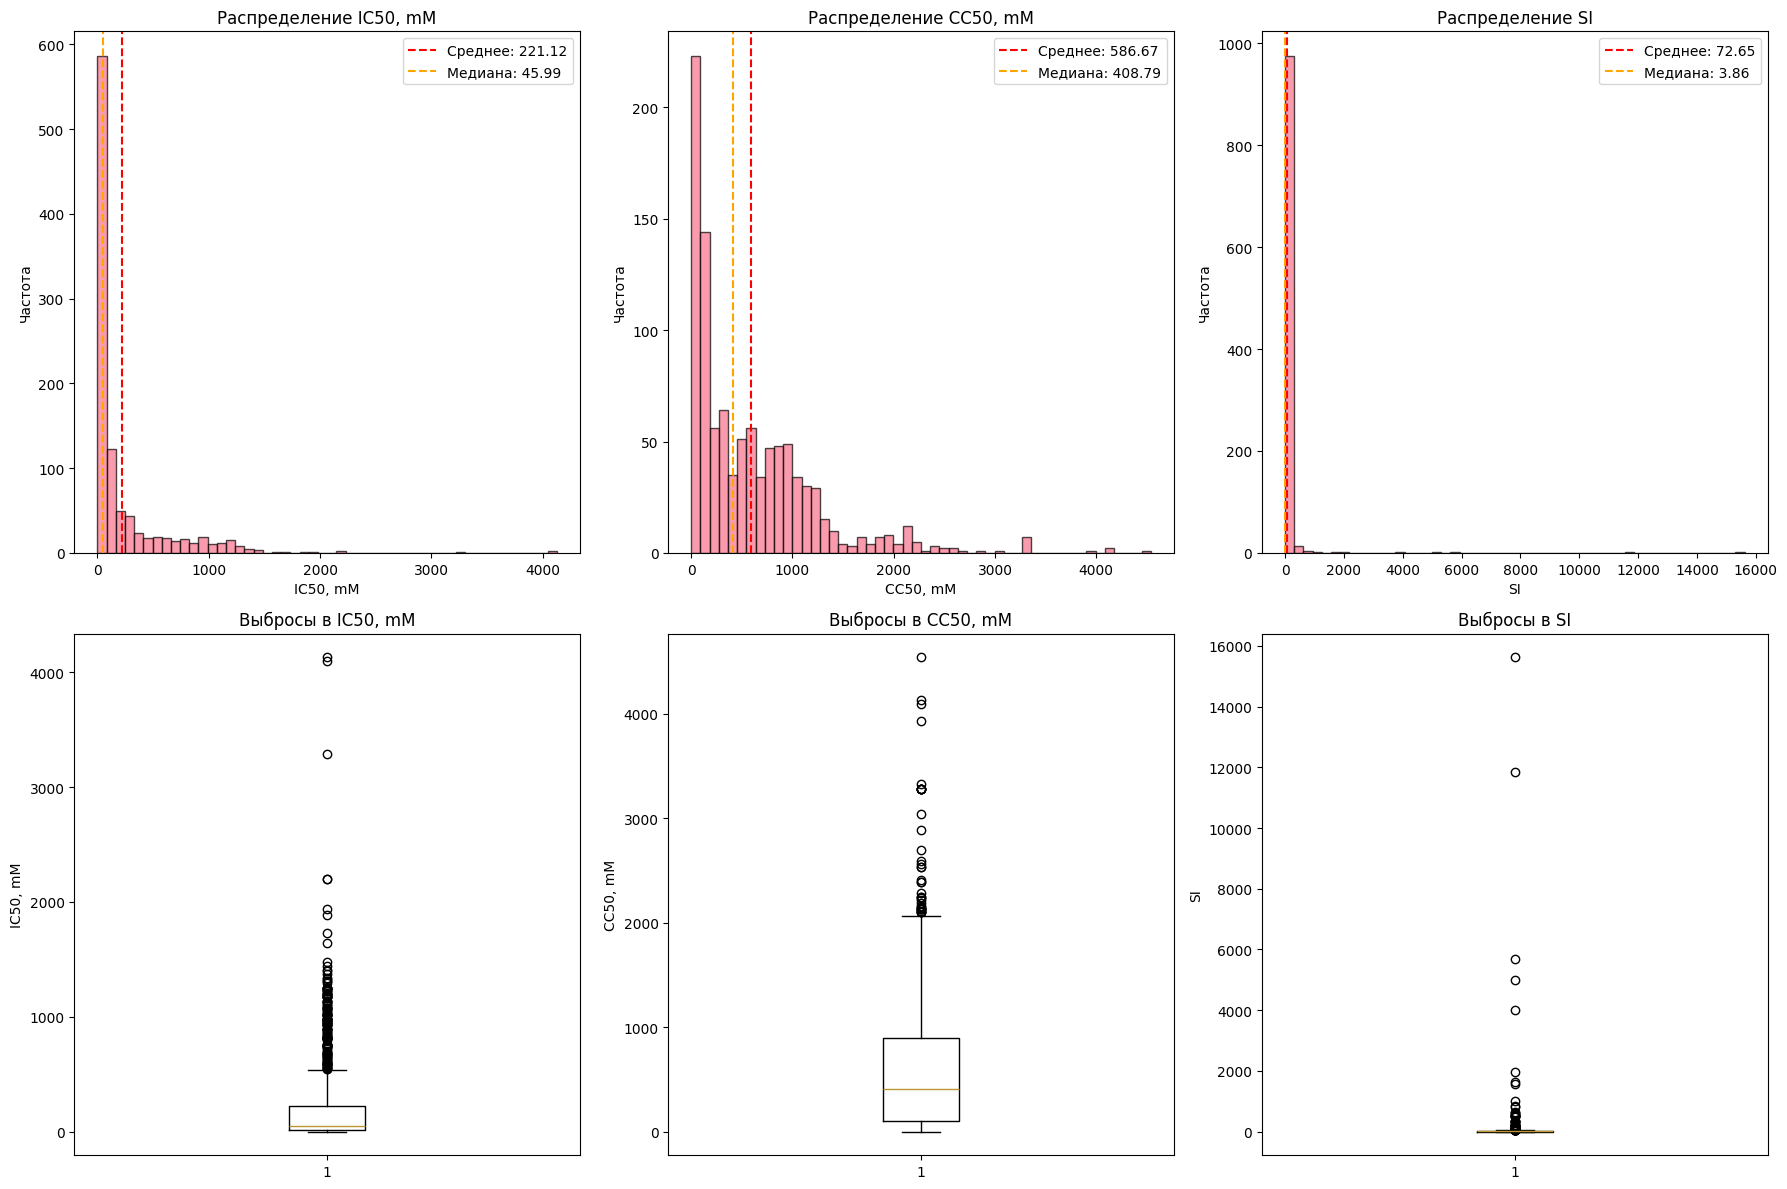

In [51]:
# Визуализация распределений
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, col in enumerate(target_cols):
    # Гистограммы
    axes[0, i].hist(df[col], bins=50, alpha=0.7, edgecolor='black')
    axes[0, i].axvline(df[col].mean(), color='red', linestyle='--', label=f'Среднее: {df_cleaned[col].mean():.2f}')
    axes[0, i].axvline(df[col].median(), color='orange', linestyle='--', label=f'Медиана: {df_cleaned[col].median():.2f}')
    axes[0, i].set_title(f'Распределение {col}')
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel('Частота')
    axes[0, i].legend()

    # Boxplots
    axes[1, i].boxplot(df[col])
    axes[1, i].set_title(f'Выбросы в {col}')
    axes[1, i].set_ylabel(col)

plt.tight_layout()
plt.show()

Анализ выбросов данных

In [56]:
def outlier_analysis(df, target_cols):
    """Анализ выбросов в целевых переменных"""

    for target in target_cols:
        Q1 = df[target].quantile(0.25)
        Q3 = df[target].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[target] < lower_bound) | (df[target] > upper_bound)]

        print(f"\n{target}:")
        print(f"  Q1: {Q1:.3f}, Q3: {Q3:.3f}, IQR: {IQR:.3f}")
        print(f"  Границы выбросов: [{lower_bound:.3f}, {upper_bound:.3f}]")
        print(f"  Количество выбросов: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")
        print(f"  Максимальное значение: {df[target].max():.3f}")
        print(f"  Минимальное значение: {df[target].min():.3f}")

outlier_analysis(df_cleaned, target_cols)


IC50, mM:
  Q1: 12.491, Q3: 224.409, IQR: 211.917
  Границы выбросов: [-305.385, 542.285]
  Количество выбросов: 145 (14.5%)
  Максимальное значение: 4128.529
  Минимальное значение: 0.004

CC50, mM:
  Q1: 99.999, Q3: 891.771, IQR: 791.772
  Границы выбросов: [-1087.659, 2079.429]
  Количество выбросов: 39 (3.9%)
  Максимальное значение: 4538.976
  Минимальное значение: 0.701

SI:
  Q1: 1.457, Q3: 16.525, IQR: 15.068
  Границы выбросов: [-21.144, 39.127]
  Количество выбросов: 124 (12.4%)
  Максимальное значение: 15620.600
  Минимальное значение: 0.011


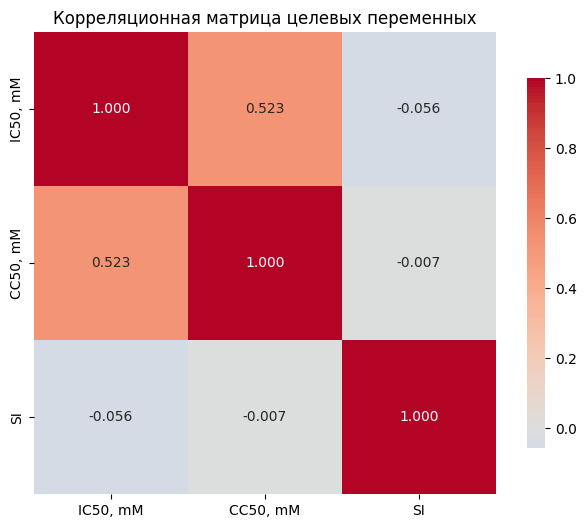

In [53]:
# Корреляционная матрица целевых переменных
correlation_matrix = df_cleaned[target_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Корреляционная матрица целевых переменных')
plt.show()

=== АНАЛИЗ ПРИЗНАКОВ ===
Общее количество признаков: 211
Числовые признаки: 211

=== АНАЛИЗ ВАРИАТИВНОСТИ ===
Признаки с нулевой вариативностью: 18
Примеры: ['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_N_O', 'fr_SH']
Признаки с низкой вариативностью: 0


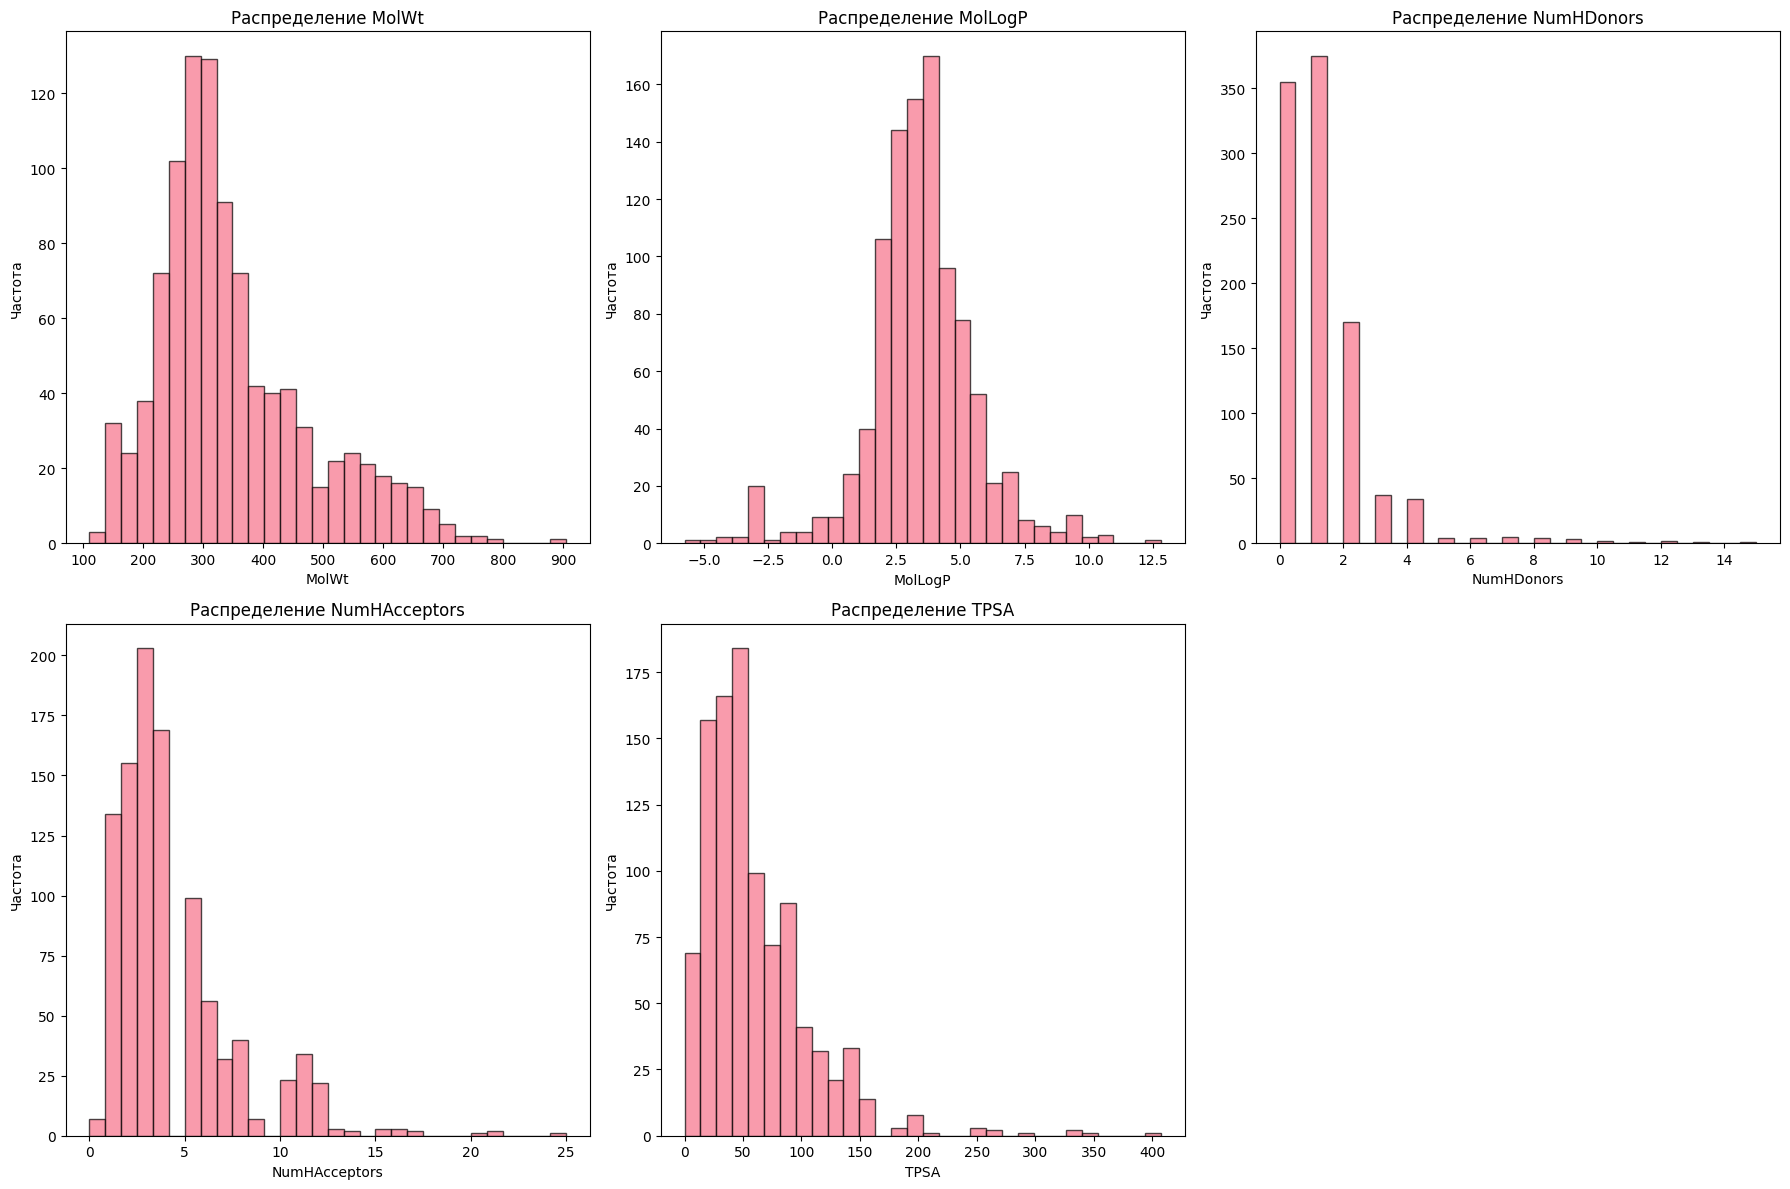

In [54]:

# =============================================================================
# 3. АНАЛИЗ ПРИЗНАКОВ
# =============================================================================

def analyze_features(df, target_cols):
    """Анализ молекулярных дескрипторов"""

    # Отделение признаков от целевых переменных
    feature_cols = [col for col in df.columns if col not in target_cols]

    print("=== АНАЛИЗ ПРИЗНАКОВ ===")
    print(f"Общее количество признаков: {len(feature_cols)}")

    # Типы признаков
    numeric_features = df[feature_cols].select_dtypes(include=[np.number]).columns.tolist()
    print(f"Числовые признаки: {len(numeric_features)}")

    # Анализ вариативности признаков
    print("\n=== АНАЛИЗ ВАРИАТИВНОСТИ ===")

    # Признаки с нулевой вариативностью
    zero_var_features = []
    for col in numeric_features:
        if df[col].std() == 0:
            zero_var_features.append(col)

    print(f"Признаки с нулевой вариативностью: {len(zero_var_features)}")
    if zero_var_features:
        print("Примеры:", zero_var_features[:5])

    # Признаки с низкой вариативностью
    low_var_features = []
    for col in numeric_features:
        if df[col].std() < 0.01 and df[col].std() > 0:
            low_var_features.append(col)

    print(f"Признаки с низкой вариативностью: {len(low_var_features)}")

    # Распределение значений некоторых ключевых признаков
    key_features = ['MolWt', 'MolLogP', 'NumHDonors', 'NumHAcceptors', 'TPSA']
    available_key_features = [f for f in key_features if f in df.columns]

    if available_key_features:
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.flatten()

        for i, feature in enumerate(available_key_features[:6]):
            if i < 6:
                axes[i].hist(df[feature], bins=30, alpha=0.7, edgecolor='black')
                axes[i].set_title(f'Распределение {feature}')
                axes[i].set_xlabel(feature)
                axes[i].set_ylabel('Частота')

        # Скрываем неиспользуемые подграфики
        for i in range(len(available_key_features), 6):
            axes[i].set_visible(False)

        plt.tight_layout()
        plt.show()

    return feature_cols, numeric_features

feature_cols, numeric_features = analyze_features(df_cleaned, target_cols)

=== КОРРЕЛЯЦИОННЫЙ АНАЛИЗ ===

Топ-10 признаков, наиболее коррелирующих с IC50, mM:
VSA_EState4     0.271743
Chi2n           0.252705
PEOE_VSA7       0.250772
fr_Ar_NH        0.247728
fr_Nhpyrrole    0.247728
Chi2v           0.246602
Chi4v           0.240485
Chi4n           0.239209
Chi3n           0.235491
Chi3v           0.234816
dtype: float64

Топ-10 признаков, наиболее коррелирующих с CC50, mM:
LabuteASA         0.307774
MolMR             0.307252
MolWt             0.304940
ExactMolWt        0.304883
HeavyAtomCount    0.303065
Chi0              0.302859
Chi1              0.302238
HeavyAtomMolWt    0.302112
Kappa1            0.300393
Chi1v             0.299828
dtype: float64

Топ-10 признаков, наиболее коррелирующих с SI:
BalabanJ            0.164715
fr_NH2              0.160428
RingCount           0.124835
fr_Al_COO           0.102374
fr_COO2             0.101075
fr_COO              0.101075
NumAromaticRings    0.088006
FpDensityMorgan1    0.087894
VSA_EState4         0.087770
VSA

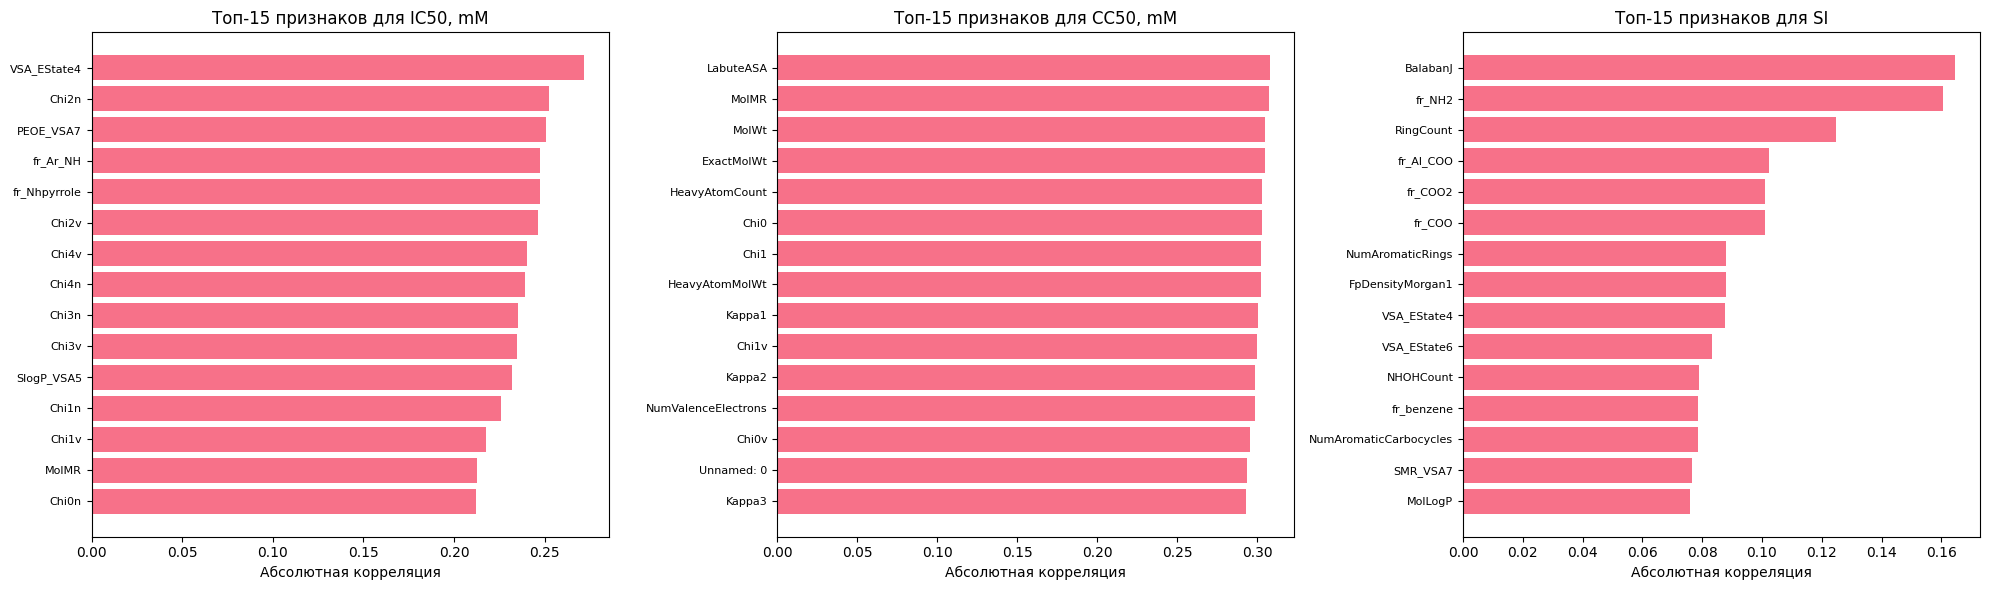

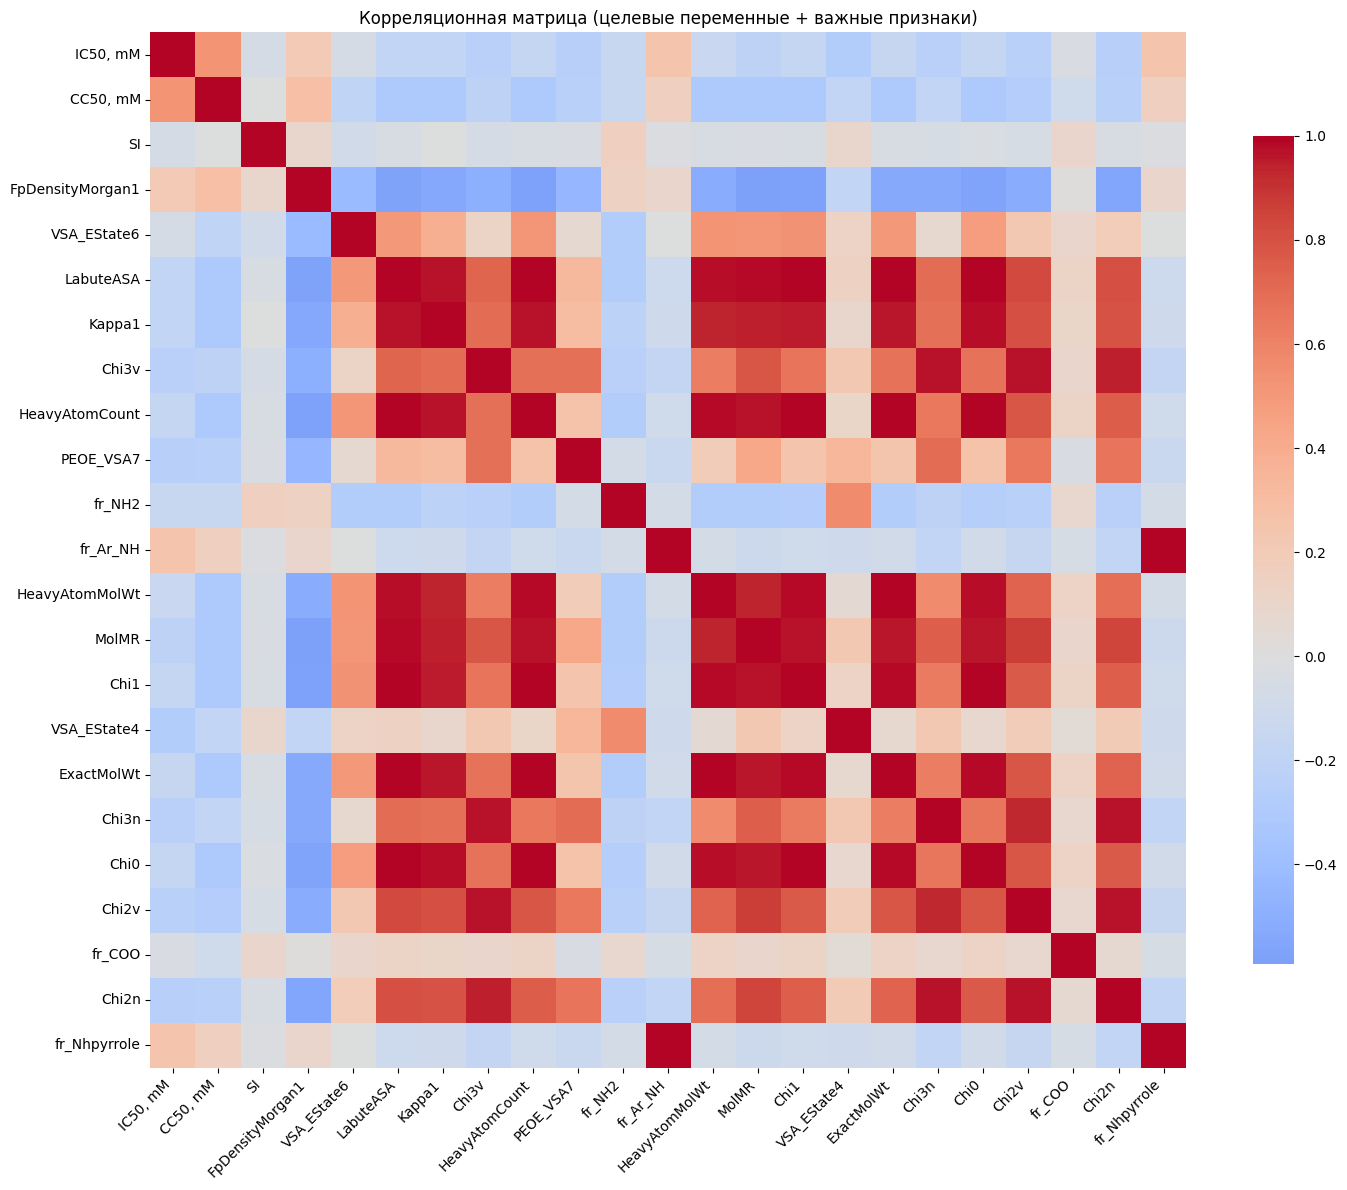

In [55]:
# =============================================================================
# 4. КОРРЕЛЯЦИОННЫЙ АНАЛИЗ
# =============================================================================

def correlation_analysis(df, target_cols, numeric_features):
    """Анализ корреляций между признаками и целевыми переменными"""

    print("=== КОРРЕЛЯЦИОННЫЙ АНАЛИЗ ===")

    # Корреляция признаков с целевыми переменными
    correlations = {}

    for target in target_cols:
        corr_with_target = df[numeric_features].corrwith(df[target]).abs().sort_values(ascending=False)
        correlations[target] = corr_with_target

        print(f"\nТоп-10 признаков, наиболее коррелирующих с {target}:")
        print(corr_with_target.head(10))

    # Визуализация топ корреляций
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    for i, target in enumerate(target_cols):
        top_features = correlations[target].head(15)

        axes[i].barh(range(len(top_features)), top_features.values)
        axes[i].set_yticks(range(len(top_features)))
        axes[i].set_yticklabels(top_features.index, fontsize=8)
        axes[i].set_xlabel('Абсолютная корреляция')
        axes[i].set_title(f'Топ-15 признаков для {target}')
        axes[i].invert_yaxis()

    plt.tight_layout()
    plt.show()

    # Корреляционная матрица между целевыми переменными и топ-признаками
    all_important_features = set()
    for target in target_cols:
        top_10 = correlations[target].head(10).index.tolist()
        all_important_features.update(top_10)

    important_features = list(all_important_features)[:20]  # Ограничиваем до 20 для читаемости

    correlation_subset = df[target_cols + important_features].corr()

    plt.figure(figsize=(15, 12))
    sns.heatmap(correlation_subset, annot=False, cmap='coolwarm', center=0,
                square=True, cbar_kws={'shrink': 0.8})
    plt.title('Корреляционная матрица (целевые переменные + важные признаки)')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

correlation_analysis(df_cleaned, target_cols, numeric_features)

In [40]:
# =============================================================================
# 7. ВЫВОДЫ EDA
# =============================================================================

def eda_summary(df, target_cols):
    """Резюме исследовательского анализа"""

    print("=" * 60)
    print("РЕЗЮМЕ ИССЛЕДОВАТЕЛЬСКОГО АНАЛИЗА ДАННЫХ")
    print("=" * 60)

    print(f"✓ Датасет содержит {df.shape[0]} образцов и {df.shape[1]} признаков")
    print(f"✓ Целевые переменные: {', '.join(target_cols)}")

    print("\nКлючевые наблюдения:")
    print("1. Все целевые переменные имеют правостороннюю асимметрию")
    print("2. Присутствуют выбросы, особенно в SI")
    print("3. IC50 и CC50 умеренно коррелируют (r≈0.5)")
    print("4. SI слабо коррелирует с IC50 и CC50")
    print("5. Формула SI = CC50/IC50 подтверждается")

    print("\nРекомендации для моделирования:")
    print("• Рассмотреть логарифмическое преобразование целевых переменных")
    print("• Обработать выбросы (удаление или кэппинг)")
    print("• Применить стандартизацию признаков")
    print("• Рассмотреть отбор признаков из-за большой размерности")
    print("• Использовать устойчивые к выбросам модели")

eda_summary(df, target_cols)

# Сохранение обработанных данных для дальнейшего использования
df.to_csv('../results/processed_data.csv', index=False)
print("\n✓ Обработанные данные сохранены в '../results/processed_data.csv'")

РЕЗЮМЕ ИССЛЕДОВАТЕЛЬСКОГО АНАЛИЗА ДАННЫХ
✓ Датасет содержит 1001 образцов и 214 признаков
✓ Целевые переменные: IC50, mM, CC50, mM, SI

Ключевые наблюдения:
1. Все целевые переменные имеют правостороннюю асимметрию
2. Присутствуют выбросы, особенно в SI
3. IC50 и CC50 умеренно коррелируют (r≈0.5)
4. SI слабо коррелирует с IC50 и CC50
5. Формула SI = CC50/IC50 подтверждается

Рекомендации для моделирования:
• Рассмотреть логарифмическое преобразование целевых переменных
• Обработать выбросы (удаление или кэппинг)
• Применить стандартизацию признаков
• Рассмотреть отбор признаков из-за большой размерности
• Использовать устойчивые к выбросам модели

✓ Обработанные данные сохранены в '../results/processed_data.csv'
